In [12]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import imageio
%matplotlib inline

(540, 2500) (540,)


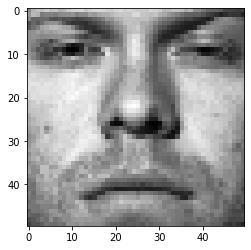

[[  5.   7.   7. ...  13.  20.  31.]
 [ 65.  74.  74. ... 111. 106.  96.]
 [101. 116. 130. ...  61.  52.  41.]
 ...
 [107. 115. 108. ...  26.  23.  24.]
 [255. 255. 255. ...  22.  22.  22.]
 [174. 178. 202. ...  28.  26.  28.]]


In [13]:
#(b)
#loading data from the training data set
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()
print(train_data)

[59.25185185 56.10185185 52.42222222 ... 67.22222222 64.61851852
 59.27592593]


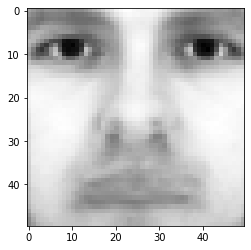

In [14]:
# (c)
#Average Face
#Compute the average face from the whole training set 
#by summing up every row in X then dividing by the number of faces
average_face = np.sum(train_data, axis = 0) /train_labels.shape[0]
print(average_face)
#Display the average face as a grayscale image.
plt.imshow(average_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

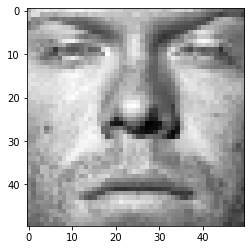

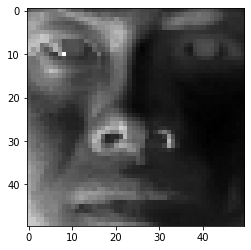

In [15]:
#(d)
#Mean Subtraction. 
#Subtract average face µ from every row in X. 
sub_avg_face = train_data - average_face

#Pick a face image after mean subtraction from the new X and display that image in grayscale.
plt.imshow(sub_avg_face[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

#Do the same thing for the test set Xtest using the pre-computed average face µ in (c).
#loading data from the testing data set
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

#Subtract average face µ from every row in Xtest.
sub_avg_face_test = test_data - average_face
plt.imshow(sub_avg_face_test[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()


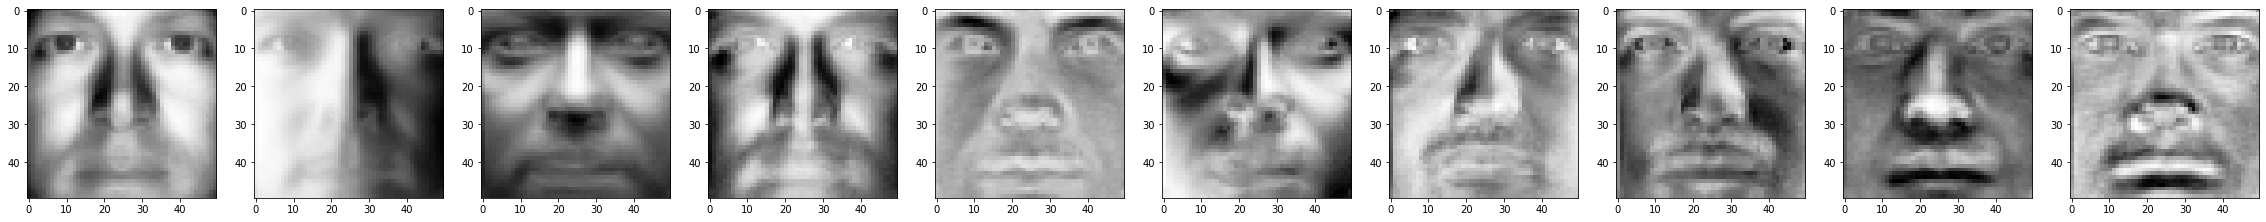

In [17]:
#(e)
#Eigenface. 
#Perform Singular Value Decomposition (SVD) on training set X (X = UΣVT) to get matrix VT
u, s, vt = np.linalg.svd(sub_avg_face)
s = np.diag(s)
#create 10 subplots and set appropriate size
fig, ax = plt.subplots(nrows=1, ncols=10)
fig.set_size_inches(40,40)

#We refer to vi,the i-th row of V T, as i-th eigenface. 
#Display the first 10 eigenfaces as 10 images in grayscale
for i in range(10):
    ax[i].imshow(vt[i, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

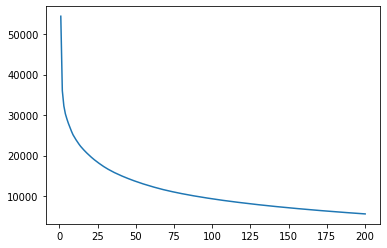

In [7]:
#(f)
#Low-rank Approximation. 
#we can approximate X by Xˆr = U[:,: r ] Σ[: r,: r ] VT[: r,:].
#The matrix Xˆr is called rank-r approximation of X. 

err = []
for r in range(1,201):
    temp = u[:,:r].dot(s[:r,:r])
    Xr = temp.dot(vt[:r,:])
    err_fnorm = np.linalg.norm(sub_avg_face - Xr, ord='fro')
    err.append(err_fnorm)
#Plot the rank-r approximation error ||X−Xˆr||F as a function of r when r = 1, 2,..., 200.
plt.plot(range(1,201),err)

In [8]:
#(g)
#Eigenface Feature.
#Write a function to generate r-dimensional feature matrix F and Ftest for training images X and test images Xtest, respectively 
#(to get F, multiply X to the transpose of first r rows of VT
#F should have same number of rows as X and r columns

def train_featurematrix_generator(r):
#multiply X to the transpose of first r rows of VT
    F = np.dot(sub_avg_face, vt[:r,:].T)
    return F

def test_featurematrix_generator(r):
#multiply X to the transpose of first r rows of VT
    Ftest = np.dot(sub_avg_face_test, vt[:r,:].T)
    return Ftest

F = train_featurematrix_generator(10)
Ftest = test_featurematrix_generator(10)
print(F.shape)
print(Ftest.shape)

(540, 10)
(100, 10)


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
# import warnings filter
import warnings 
# ignore all future warnings
warnings.simplefilter('ignore')

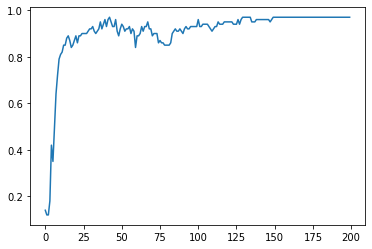

In [11]:
#(h)
#Face Recognition.
#Extract training and test features for r = 10. 
#Train a Logistic Regression model using F and test on Ftest. 
#Report the classification accuracy on the test set. 
#Plot the classification accuracy on the test set as a function of r when r = 1, 2,..., 200. 
accuracy = []
logreg = LogisticRegression(multi_class='ovr')

for r in range(1, 201):
    F = train_featurematrix_generator(r)
    Ftest = test_featurematrix_generator(r)
    model = logreg.fit(F, train_labels)
    pred = model.predict(Ftest)
    score = model.score(Ftest, test_labels)
    accuracy.append(score)
    
plt.plot(accuracy)
plt.show()


In [13]:
F = train_featurematrix_generator(10)
Ftest = test_featurematrix_generator(10)
clf = LogisticRegression().fit(F, train_labels)
pred = clf.predict(Ftest)
score = clf.score(Ftest, test_labels)
print(score)

0.79
